<a href="https://colab.research.google.com/github/AKSeavey/1_Naive-Bayes-Classifier/blob/main/20230602_Drew_Seavey_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction Success Prediction

## Problem Definition


In this supervised learning problem, the gaussian naive bayes classification technique will be implemented through the Scikit Learn package to predict whether a future customer will make a transaction based on their transaction history.

## Data Collection/Sources


In [1]:
# load libraries
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# point to csv file
train_path = '/content/drive/MyDrive/Colab Notebooks/project_1/Train.csv'

In [4]:
# load csv data as pandas dataframe
train_orig = pd.read_csv(train_path)

In [5]:
# confirmed
type(train_orig)

pandas.core.frame.DataFrame

## Data Cleaning


In [6]:
# create copy of train_orig pandas dataframe
train = train_orig.copy()

In [ ]:
# take a look at some properties of the dataset
train.info()

In [ ]:
# what's the size of the dataset?
train.shape

(180000, 53)

In [ ]:
# whoa

In [ ]:
# quick glance at a small portion of the data with head()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
# maybe catch something by looking at it transposed?
train.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID_code,train_0,train_1,train_2,train_3,train_4
target,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834
var_2,11.9081,13.8588,12.0805,8.9522,12.8746
var_3,5.1187,5.6208,6.9427,5.8428,5.9405
var_4,5.747,8.0851,5.9525,8.245,7.6784
var_5,14.0137,14.0239,14.1929,13.8463,13.8481
var_6,0.5745,8.4135,7.3124,11.9704,7.8895


In [ ]:
# due to the binary nature of the target column, let's do a value_counts()
# looks like quite a bit of bias in the dataset, 0 as majority
train['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [ ]:
# Unnamed: 0 and ID_code do not seem to be of use, let's drop'm
train.drop(columns = ['Unnamed: 0', 'ID_code'], inplace = True)

In [ ]:
# check and see if dropped
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
# train.info() appeared to show no nulls, but confirm with isna()
train.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# looks like no null values in the columns
train.isna().sum()

target    0
var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
var_14    0
var_15    0
var_16    0
var_17    0
var_18    0
var_19    0
var_20    0
var_21    0
var_22    0
var_23    0
var_24    0
var_25    0
var_26    0
var_27    0
var_28    0
var_29    0
var_30    0
var_31    0
var_32    0
var_33    0
var_34    0
var_35    0
var_36    0
var_37    0
var_38    0
var_39    0
var_40    0
var_41    0
var_42    0
var_43    0
var_44    0
var_45    0
var_46    0
var_47    0
var_48    0
var_49    0
dtype: int64

In [ ]:
# total nulls
train.isna().sum().sum()

0

In [ ]:
# target is int64
# var_n = float64
# any data type conflict here or is this OK?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

## Exploratory Data Analysis


### Summary Statistics and Model Properties

In [ ]:
# check out some summary statistics on the data set
summary_stats = train.describe()
summary_stats

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,49.044300,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [ ]:
# check target values - only 0's and 1's... which is what we want
train['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [ ]:
# let's see what percentage is 1 (yes will make a transaction) vs 0 (no, will not)
sum(train['target'])*100/len(train['target'])

10.022222222222222

In [ ]:
# grab a random sample of the data and set to variable sample_1
sample_1 = train.sample(n=10)
sample_1

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
98056,1,8.5220,-4.1587,17.7581,6.3898,7.9634,13.7116,10.9926,10.2284,12.6665,...,5.4558,9.9238,1.2109,14.3414,7.1637,10.0578,2.8149,8.2737,0.9399,16.0073
99747,0,15.6471,7.3450,7.4893,4.4081,8.2660,13.8465,7.3088,11.9967,9.2163,...,5.2766,-0.2003,4.0810,23.6939,1.4177,9.7406,2.9781,4.8867,3.1066,13.7140
109623,0,13.2423,-5.1197,9.6846,6.0285,6.8152,14.0000,11.9110,11.6790,24.8399,...,5.6765,6.8198,-4.5136,19.4201,1.7705,20.1871,7.0135,5.6119,4.5491,12.4047
1343,0,10.7289,-3.6699,12.3854,4.6962,8.9287,13.9131,14.4536,22.3316,22.2719,...,5.8895,4.6966,1.0733,26.9602,-1.6792,24.3761,10.8010,3.4651,2.2207,21.4853
139369,0,14.8137,1.2045,9.9733,4.9122,8.2806,13.7600,7.8233,13.5553,5.4926,...,5.4924,-4.5666,0.1787,22.3383,5.2953,19.6483,9.2787,7.6355,2.5374,19.1749
134531,1,12.0034,-0.4863,9.8098,4.6887,6.9866,13.8161,8.4230,14.8354,19.4662,...,5.6932,-2.9920,3.5612,17.5338,3.5582,32.7890,5.9348,7.0620,2.4691,12.3404
137513,0,9.1327,-0.6549,13.6304,3.7542,6.5517,13.8520,15.7885,14.0078,17.3483,...,5.4471,3.1173,7.3459,9.5755,-0.2327,27.1134,5.3063,8.5729,0.9206,16.4549
61061,0,11.2944,-4.2060,5.9266,5.6014,8.3900,13.6511,12.3657,20.5872,2.5422,...,5.8270,-0.1610,-1.4786,15.6747,2.1799,15.1270,6.7933,5.9138,-0.1415,11.5226
141339,0,12.8668,0.6507,7.9903,4.5370,8.8868,13.9794,5.1531,-0.8091,23.6051,...,6.3540,-2.4028,-3.9144,31.6517,4.8657,9.9475,10.8793,7.8017,2.0837,17.0837
165401,0,11.9862,1.2144,17.1041,6.3252,9.2233,14.0937,12.3883,5.6993,40.8852,...,5.9418,6.3866,2.6401,26.3154,1.5729,12.4422,8.0439,9.0581,1.7471,15.5983


In [ ]:
# sample_1 is a pandas dataaframe
type(sample_1)

pandas.core.frame.DataFrame

### Correlation Matrix

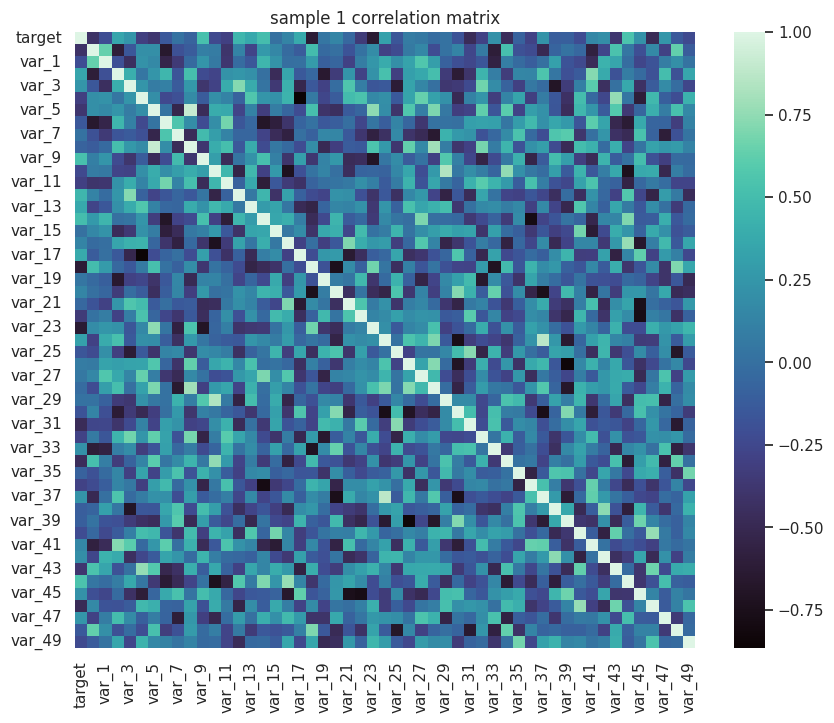

In [ ]:
# plot correlation matrix of sample_1
correlation_matrix = sample_1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='mako')
plt.title('sample 1 correlation matrix')
# tried the x/yticks method but didn't really like the output...
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [ ]:
# this might be misleading because correlation coefficients range from 1- to 1
# next cell, let's correct this for a better idea of correlation
avg_corr_square = correlation_matrix.mean().mean()
avg_corr_square

0.024549023823508143

In [ ]:
# will now try calculating average correlation by using only upper triangluar part of matrix
upper_tri = np.triu(correlation_matrix, k=1)
avg_corr_triang = np.mean(upper_tri)
avg_corr_triang

0.0024705903431266178

In [ ]:
difference = avg_corr_square - avg_corr_triang
difference

0.022078433480381524

In [ ]:
# highest amount of correlation
np.max(upper_tri)

0.9096361529270496

In [ ]:
# lowest amount of correlation
np.min(upper_tri)

-0.8649233135672445

### Univariate Density Plot

In [ ]:
# looks like this wasn't in the original library imports
import random

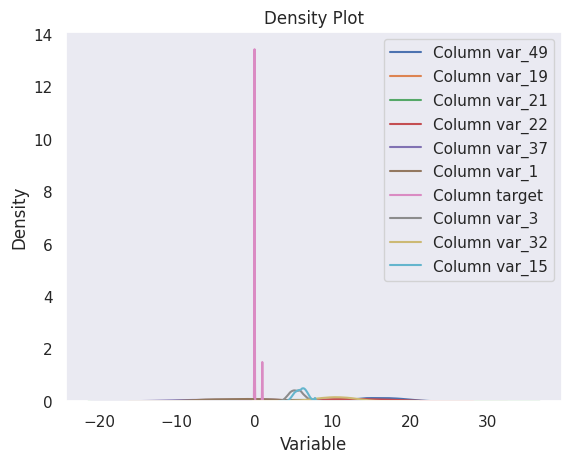

In [ ]:
# this will compare density plots from a random sampling of columns
# this is a univariate plot and will not speak to correlation
num_columns = len(train.columns)
sampled_columns = random.sample(range(num_columns),10)

for column_idx in sampled_columns:
  column_name = train.columns[column_idx]
  sns.kdeplot(data=train[column_name], label=f'Column {column_name}')
  plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Density Plot')
plt.legend()
plt.show()

In [ ]:
# distribution of samples appear to be mostly symmetrical with a few exceptions
# distribution appears unbounded
# assuming a normal distribution (continuous)

In [ ]:
#create another sample... thinking sample_1 at n=10 might be too computationally intensive
sample_2 = train.sample(n=2)

In [ ]:
# ran for more than 3 mintues and I decided to pull the plug... time to look for alternative methods
# sns.pairplot(sample_2)
# plt.show()

### Correlation Network

In [ ]:
# Correlation Network using Networkx and Plotly:
import networkx as nx
import plotly.graph_objects
import plotly.graph_objects as go
import plotly.colors as pc

In [ ]:
# create a network graph
G = nx.from_pandas_adjacency(correlation_matrix)

In [ ]:
# Create a network graph
G = nx.from_pandas_adjacency(correlation_matrix)

# Prepare node positions
pos = nx.spring_layout(G)

# Create a list of nodes and their positions
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create node labels
node_labels = list(correlation_matrix.columns)

# Plot the correlation network using Plotly
fig = go.Figure(data=[
    go.Scatter(
        x=edge_x,
        y=edge_y,
        mode='lines',
        line=dict(color='rgb(125,125,125)', width=0.5),
        hoverinfo='none'
    ),
    go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        marker=dict(
            color='rgb(0,0,0)',
            size=10
        ),
        text=node_labels,
        hovertemplate='%{text}',
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
        hoverinfo='text'
    )
])

fig.update_layout(
    title='Correlation Network',
    title_x=0.5,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()

In [ ]:
# Create a network graph with heatmap
G = nx.from_pandas_adjacency(correlation_matrix)

# Prepare node positions
pos = nx.spring_layout(G)

# Create a list of nodes and their positions
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create edges
edge_x = []
edge_y = []
edge_colors = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_colors.append(correlation_matrix.loc[edge[0], edge[1]])

# Create node labels
node_labels = list(correlation_matrix.columns)

# Plot the correlation network using Plotly
fig = go.Figure(data=[
    go.Scatter(
        x=edge_x,
        y=edge_y,
        mode='lines',
        line=dict(color='rgb(125,125,125)', width=0.5),
        hoverinfo='none'
    ),
    go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        marker=dict(
            color=edge_colors,
            colorscale='Magma',
            size=10,
            colorbar=dict(title='Correlation')
        ),
        text=node_labels,
        hovertemplate='%{text}',
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
        hoverinfo='text'
    )
])

fig.update_layout(
    title='Correlation Network',
    title_x=0.5,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()


### Pairplot Study

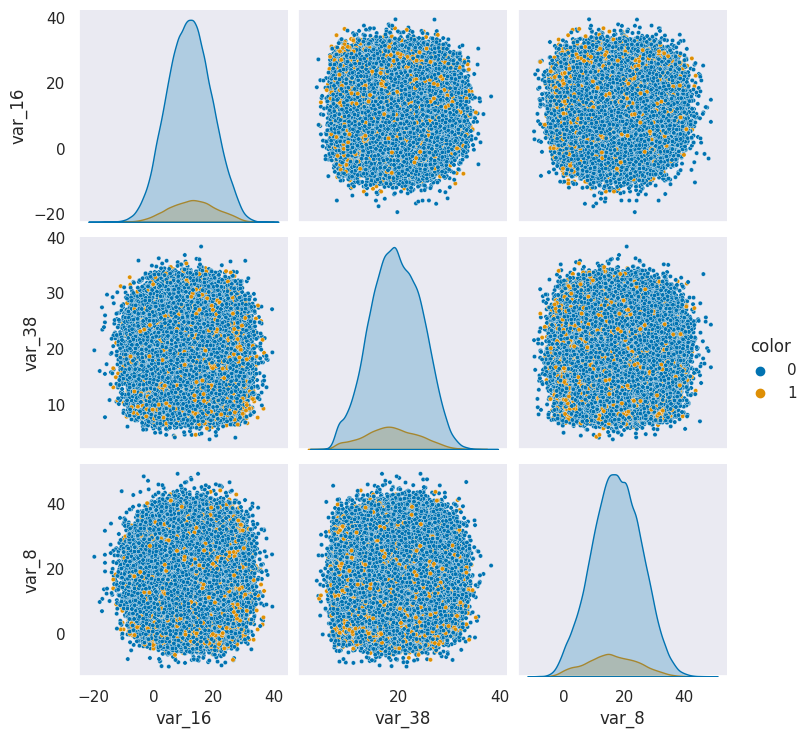

In [ ]:
# Pairplot between subset with negative correlation

# Define the subset of variables for analysis
subset_var_1 = ['var_16', 'var_38', 'var_8']
subset_data = train[subset_var_1].copy()  # Make a copy of the subset_data DataFrame

# Add a new column 'color' to the subset_data DataFrame
subset_data['color'] = train['target']

# Set the style of the plot
sns.set(style="dark")

# Create the pairplot with color
sns.pairplot(subset_data, hue='color', palette='colorblind', plot_kws={'s': 10})

# Display the plot
plt.show()

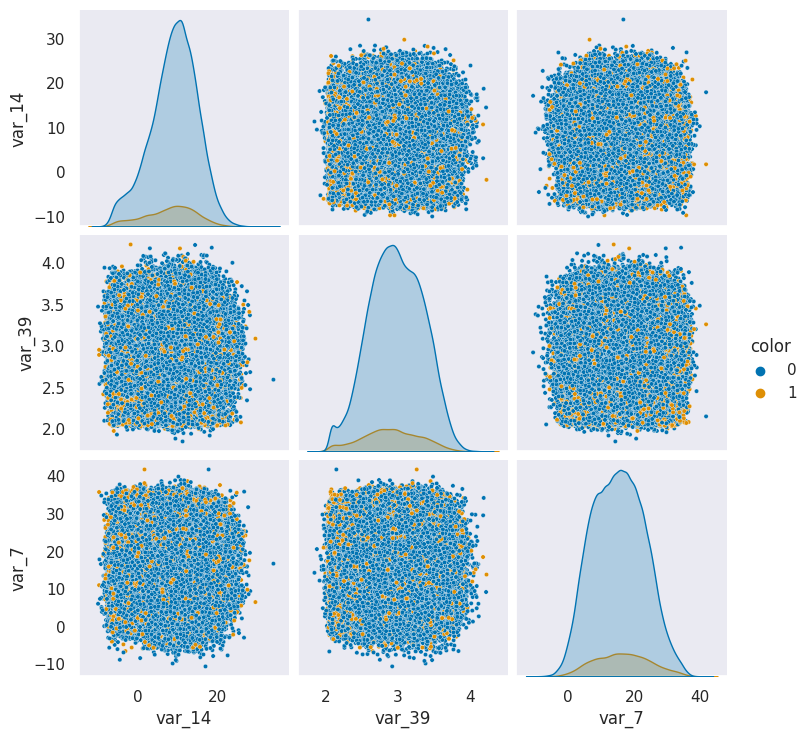

In [ ]:
# Pair plot between subset with positive correlation
# Define the subset of variables for analysis
subset_var_1 = ['var_14', 'var_39', 'var_7']
subset_data = train[subset_var_1].copy()  # Make a copy of the subset_data DataFrame

# Add a new column 'color' to the subset_data DataFrame
subset_data['color'] = train['target']

# Set the style of the plot
sns.set(style="dark")

# Create the pairplot with color
sns.pairplot(subset_data, hue='color', palette='colorblind', plot_kws={'s': 10})

# Display the plot
plt.show()

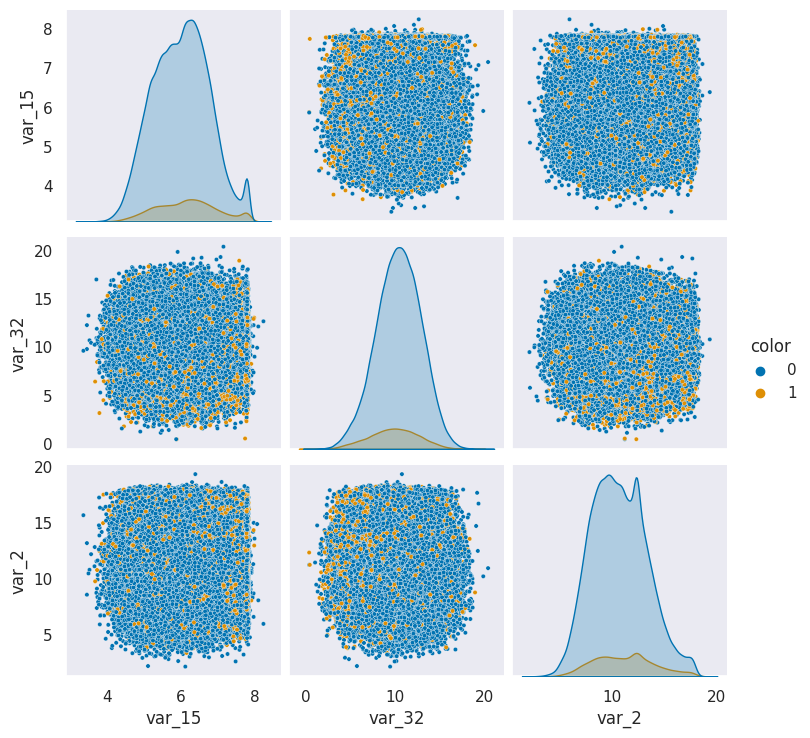

In [ ]:
# Pair plot between subset with close to 0 correlation
# Define the subset of variables for analysis
subset_var_1 = ['var_15', 'var_32', 'var_2']
subset_data = train[subset_var_1].copy()  # Make a copy of the subset_data DataFrame

# Add a new column 'color' to the subset_data DataFrame
subset_data['color'] = train['target']

# Set the style of the plot
sns.set(style="dark")

# Create the pairplot with color
sns.pairplot(subset_data, hue='color', palette='colorblind', plot_kws={'s': 10})

# Display the plot
plt.show()

In [ ]:
# notice the flat edges... curious

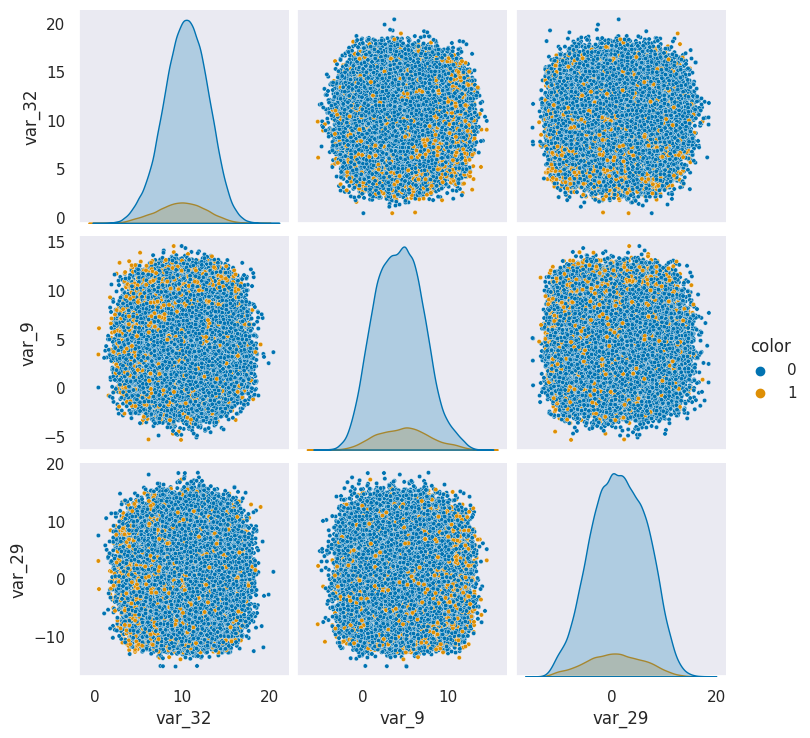

In [ ]:
# will now try 3 features that have short edges between nodes on the correlation network
# Define the subset of variables for analysis
subset_var_1 = ['var_32', 'var_9', 'var_29']
subset_data = train[subset_var_1].copy()  # Make a copy of the subset_data DataFrame

# Add a new column 'color' to the subset_data DataFrame
subset_data['color'] = train['target']

# Set the style of the plot
sns.set(style="dark")

# Create the pairplot with color
sns.pairplot(subset_data, hue='color', palette='colorblind', plot_kws={'s': 10})

# Display the plot
plt.show()

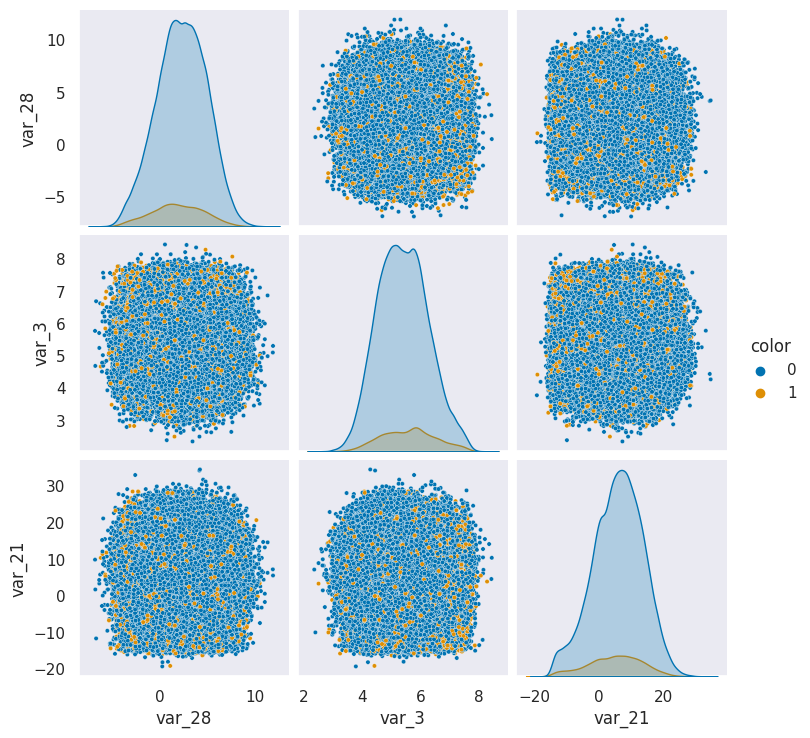

In [ ]:
# will now try 3 features that have long edges between nodes on the correlation network
# Define the subset of variables for analysis
subset_var_1 = ['var_28', 'var_3', 'var_21']
subset_data = train[subset_var_1].copy()  # Make a copy of the subset_data DataFrame

# Add a new column 'color' to the subset_data DataFrame
subset_data['color'] = train['target']

# Set the style of the plot
sns.set(style="dark")

# Create the pairplot with color
sns.pairplot(subset_data, hue='color', palette='colorblind', plot_kws={'s': 10})

# Display the plot
plt.show()

## Processing


### Guassian Naive Bayes Classifier for Full Model

In [ ]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
target_0_df = train[train['target'] == 0].copy()
target_1_df = train[train['target'] == 1].copy()

In [ ]:
predictor_col = train.iloc[:, 1:50].copy()
target_col = train.loc[:, 'target'].copy()

In [ ]:
gnb = GaussianNB()

In [ ]:
y = target_col
X = predictor_col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # stratify=y?
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeld points out of a total %d points: %d"
      % (X_test.shape[0], (y_test !=y_pred).sum()))

Number of mislabeld points out of a total 36000 points: 3282


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9088333333333334


In [ ]:
#accuracy = (y_test !=y_pred).sum()/X_test.shape[0]
#accuracy

In [ ]:
num_loops = 20

def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """
  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 20)
print(round(accuracy_scores.mean(), 5))

0.91102


In [ ]:
# Cross-validation using StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
accuracy_scores = cross_val_score(gnb, X, y, cv=cv)
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", round(mean_accuracy, 5))

Mean Accuracy: 0.91053


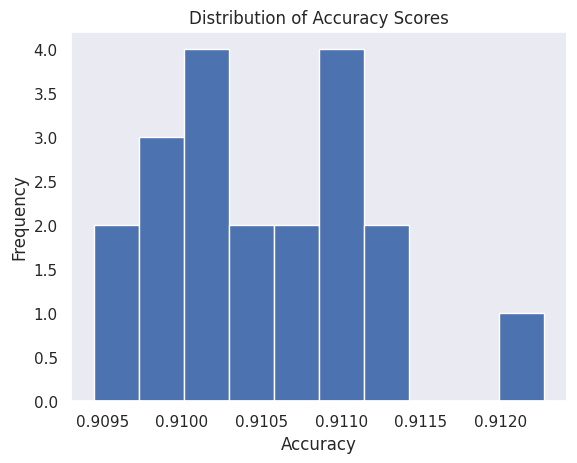

In [ ]:
plt.hist(accuracy_scores)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores')
plt.show();

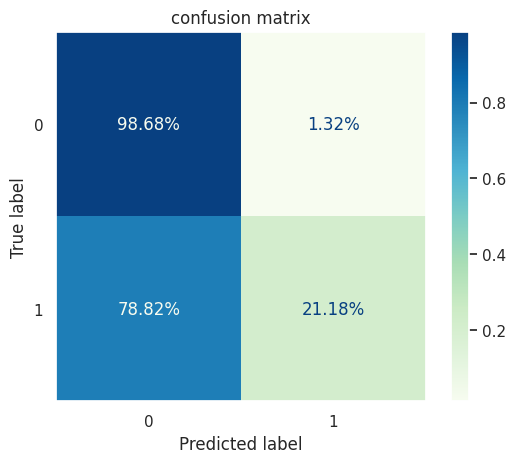

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, normalize = 'true', values_format = '.2%', cmap='GnBu')
plt.title('confusion matrix');
plt.savefig('confusion_matrix.png')

In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.21      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.63     36000
weighted avg       0.89      0.91      0.89     36000



### Guassian Naive Bayes Classifier for Balanced Model

In [ ]:
target_0_df.value_counts().sum()

161960

In [ ]:
target_1_df.value_counts().sum()

18040

In [ ]:
num_rows_balance = target_1_df.shape[0] # [0] at the end indexes rows.  .shape method returns a tuple

In [ ]:
target_0_sample = target_0_df.sample(n=num_rows_balance, random_state=0)
balanced_train = pd.concat([target_0_sample, target_1_df], axis=0)

In [ ]:
balanced_train['target'].value_counts()

0    18040
1    18040
Name: target, dtype: int64

In [ ]:
target_0_balanced = balanced_train[balanced_train['target'] == 0].copy()
target_1_balanced = balanced_train[balanced_train['target'] == 1].copy()

In [ ]:
predictor_col_balanced = balanced_train.iloc[:, 1:50].copy()
target_col_balanced = balanced_train.loc[:, 'target'].copy()

In [ ]:
y = target_col_balanced
X = predictor_col_balanced

In [ ]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.20, random_state=0) # stratify=y?
gnb.fit(X_train_bal, y_train_bal)
y_pred_bal = gnb.predict(X_test_bal)
print("Number of mislabeld points out of a total %d points: %d"
      % (X_test.shape[0], (y_test !=y_pred).sum()))

Number of mislabeld points out of a total 36000 points: 3282


In [ ]:
accuracy_balanced = accuracy_score(y_test_bal, y_pred_bal)
print("Accuracy:", accuracy_balanced)

Accuracy: 0.7541574279379157


In [ ]:
num_loops = 20

def cross_validate_balanced(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """
  accuracy_scores_balanced = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train_bal, X_test_bal, y_train_bal, y_test_bal = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train_bal, y_train_bal)
    y_split_pred_bal = model_split_cv.predict(X_test_bal)
    accuracy_scores[i] = metrics.accuracy_score(y_test_bal, y_split_pred_bal)

  return accuracy_scores_balanced

In [ ]:
accuracy_scores_balanced = cross_validate_balanced(X, y, 20)
print(round(accuracy_scores.mean(), 5))

0.7543


In [ ]:
# Cross-validation using StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
accuracy_scores_balanced = cross_val_score(gnb, X, y, cv=cv)
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", round(mean_accuracy, 5))

Mean Accuracy: 0.7543


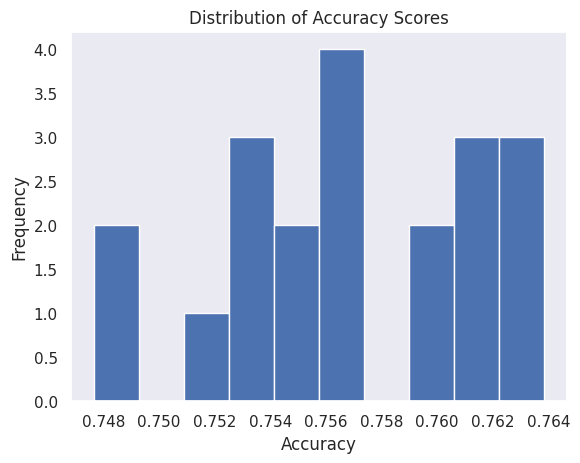

In [ ]:
plt.hist(accuracy_scores_balanced)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores')
plt.show();

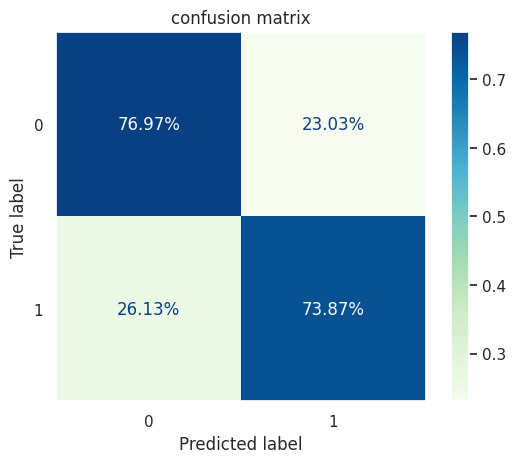

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(gnb, X_test_bal, y_test_bal, normalize = 'true', values_format = '.2%', cmap='GnBu')
plt.title('confusion matrix');
plt.savefig('confusion_matrix_bal.png')

In [ ]:
# Classification report
report_bal = classification_report(y_test_bal, y_pred_bal)
print(report_bal)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3599
           1       0.76      0.74      0.75      3617

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216




## Data Visualization/Communication of Results


In [ ]:
# Classification report for model 1
report1 = classification_report(y_test, y_pred)

# Classification report for model 2 (balanced)
report2 = classification_report(y_test_bal, y_pred_bal)

print(report1)
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.21      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.63     36000
weighted avg       0.89      0.91      0.89     36000

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3599
           1       0.76      0.74      0.75      3617

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



#### Full Data Set



*   Model is great at predicting true negatives and good at predicting false negatives
*   This model is not good at predicting false positives or true positives





#### Balanced Data Set


*   Model is good at predicting true negatives and good at predicting true positives
*   This model is not good at predicting false positives or false negatives



#### Conclusion

To compare the two classification reports above, we can look at several metrics: precision, recall, F1-score, and accuracy.

In the first (full model) classification report:
- Class 0 has a precision of 0.92, recall of 0.99, F1-score of 0.95, and an accuracy of 0.91.
- Class 1 has a precision of 0.64, recall of 0.21, F1-score of 0.32, and an accuracy of 0.91.

In the second (balanced model) classification report:
- Class 0 has a precision of 0.75, recall of 0.77, F1-score of 0.76, and an accuracy of 0.75.
- Class 1 has a precision of 0.76, recall of 0.74, F1-score of 0.75, and an accuracy of 0.75.

In summary, when comparing these classification reports for evaluating the Gaussian Naive Bayes classifier, it's essential to consider precision, recall, F1-score, and accuracy. While accuracy alone can be misleading in imbalanced datasets, it provides an overall measure of correctness. In the case of the imbalanced data seen in the full model, the first classification report, despite being biased, shows higher precision, recall, F1-scores, and accuracy for both classes. However, if the dataset is balanced, the second classification report provides a fair assessment of the model's performance with similar precision, recall, F1-scores, and accuracy for both classes. Choosing the appropriate evaluation approach depends on the dataset's balance to ensure a comprehensive understanding of the classifier's performance.
